#ANÁLISE EXPLORATÓRIA DE DADOS

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data_housing = pd.read_csv('/content/drive/MyDrive/housing.csv')

In [10]:
data_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
data_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
data_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
data_housing.isnull().sum() #valores faltantes

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [14]:
#remover linha de valores faltantes
data_housing_sem_faltantes = data_housing.dropna()

In [15]:
#verificar se ainda há valores faltantes
data_housing_sem_faltantes.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


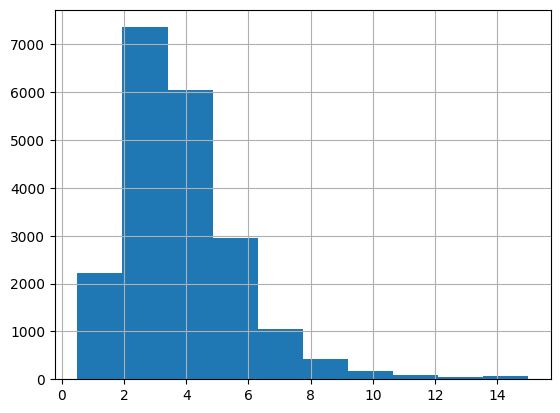

In [16]:
#histograma com a média de renda
histograma = data_housing_sem_faltantes['median_income'].hist()

In [17]:
unique_values = data_housing_sem_faltantes['ocean_proximity'].unique()
print(unique_values)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']



*   NEAR BAY: Casas localizadas perto de uma baía.
*   <1H OCEAN: Casas localizadas a menos de uma hora de distância do oceano. O "<1H" indica a distância em relação à costa.
*INLAND: Casas localizadas no interior, longe da costa.
*NEAR OCEAN: Casas localizadas perto do oceano.
*ISLAND: Casas localizadas em ilhas.







<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

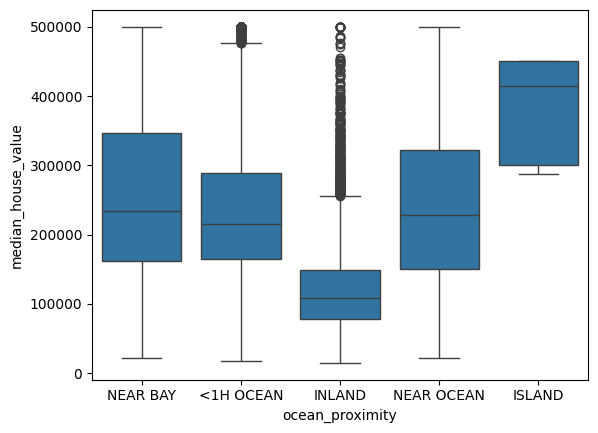

In [18]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data_housing_sem_faltantes)

--> Este gráfico indica que a proximidade com o oceano eleva o valor mediano das casas.

<Axes: xlabel='ocean_proximity', ylabel='count'>

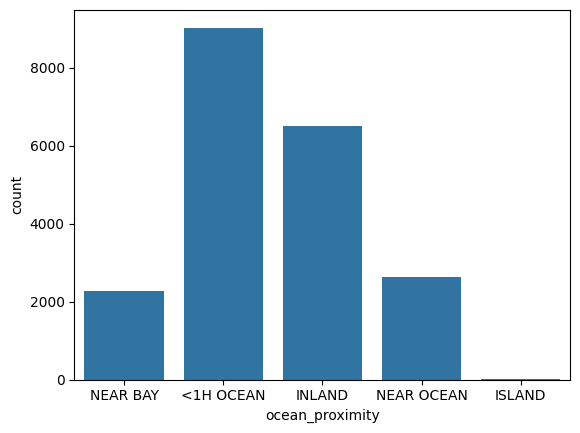

In [19]:
sns.countplot(x='ocean_proximity', data=data_housing_sem_faltantes)

--> Mais de 8000 casas estão localizadas a menos de uma hora de distância do oceano.

In [20]:
#alterando o nome do dataset para 'data'
data = data_housing_sem_faltantes

print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


#APLICAÇÃO DO K-MEANS

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
#Selecionando apenas as colunas numéricas
colunas_numericas = data.select_dtypes(include=np.number).columns[:-1]
X = data[colunas_numericas]

In [23]:
# Padronizar os dados para que todas as features tenham a mesma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Método do Cotovelo:
inertia = []
for i in range(1, 11):  # Testar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

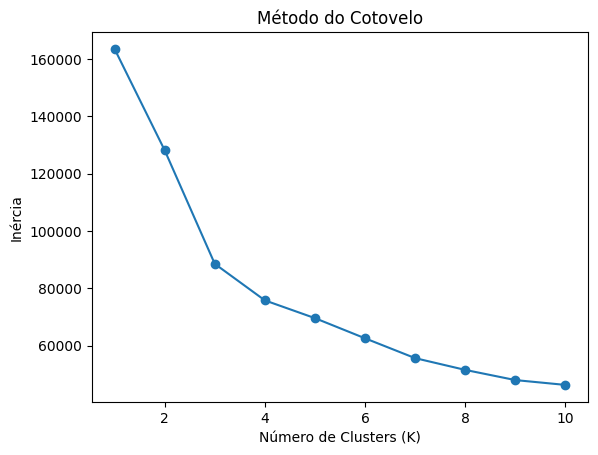

In [25]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.show()

Escolher o valor de K onde a curva do método do cotovelo apresenta uma inflexão (cotovelo)

In [26]:
# Aplicar o K-means com o número ideal de clusters:

# cluesters (baseado no método do cotovelo)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [27]:
#  Adicionar os labels dos clusters ao DataFrame original:

data['cluster'] = kmeans.labels_

<ipython-input-27-62531fa0ecd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


# Clusters SEM a variável categórica

In [28]:

# Analisar as características dos clusters SEM A VARIÁVEL DE PROXIMIDADE COM O OCEANO
for i in range(4):  # Para cada cluster
    print(f"Cluster {i}:")
    print(data[data['cluster'] == i].describe())


Cluster 0:
         longitude     latitude  housing_median_age   total_rooms  \
count  2923.000000  2923.000000         2923.000000   2923.000000   
mean   -119.158495    35.184259           18.876839   5256.974684   
std       1.875520     1.877723            9.257028   1712.984835   
min    -124.190000    32.550000            2.000000    538.000000   
25%    -121.270000    33.870000           12.000000   4040.000000   
50%    -118.380000    34.170000           18.000000   4921.000000   
75%    -117.800000    37.300000           25.000000   6188.000000   
max    -114.310000    41.610000           52.000000  12342.000000   

       total_bedrooms   population   households  median_income  \
count     2923.000000  2923.000000  2923.000000    2923.000000   
mean      1085.061238  2777.959288   997.751283       4.089495   
std        312.606680   893.648657   280.330244       1.819181   
min         98.000000   483.000000   105.000000       0.677500   
25%        851.000000  2132.500000   

##Análise dos resultados SEM a variável categórica

Os dados foram divididos em 4 clusters **sem considerar a variavel de proximidade como oceano**. Sem considerar essa característica os dados ficam muito genéricos apresentando relação entre o tamanho dos imóveis, a densidade populacional e o valor médio das casas com dispersão muito alta.
Neste contexto:


*   Cluster 0: apresentou valor médio alto de 220.479, porém com ampla dispersão de 109.740. Quanto as variáveis numéricas total_rooms,total_bedrooms,population, households e median_income apresentaram uma alta dispersão sugerindo mistura de casasgrande e pequenas com diferentes níveis de densidade populacional e uma variedade de nívei de renda. A mediana de idade das casas (housing_median_age) apresentou-se mais baixa o que pode indicar que as casas desse cluster são mais recentes.

*   Cluster 1: Representa um grupo de casas com valores médios mais baixos (194.692). Com relação ao tamanho e densidade apresentam um tamanho médio, nem grande nem pequenas. A renda média pressupõem uma renda razoável, porém a alta dispersão sugere uma variedade alta nesse grupo.

*   Cluster 2: Apresenta alta densidade populacional.  A média de total_rooms (13.785) e households (2.380) é muito alta, indicam que esse cluster contém casas maiores ou com mais domicílios.A idade das casas (12,18) é baixa, indicando que as casas tendem a ser mais novas. Porém, também apresenta alta variabilidade de renda e e valores das casas.

*   Cluster 3: Esse cluster apresentou valores de casas médios mais acessiveis e densidade populacional moderada, porém também apresentou alta dispersão nas outras variáveis corroborando com o que já foi dito anteriormente sobre a necessidade da variável categórica de proximidade como oceano para identificar melhor definição entre os grupos.











# Clusters COM a variável categórica

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(data[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ocean_proximity']))
df_encoded = pd.concat([data.drop('ocean_proximity', axis=1), encoded_df], axis=1)


In [31]:
# Analisar as características dos clusters:
for i in range(4):  # Para cada cluster
    print(f"Cluster {i}:")
    print(df_encoded[df_encoded['cluster'] == i].describe())


Cluster 0:
         longitude     latitude  housing_median_age   total_rooms  \
count  2923.000000  2923.000000         2923.000000   2923.000000   
mean   -119.158495    35.184259           18.876839   5256.974684   
std       1.875520     1.877723            9.257028   1712.984835   
min    -124.190000    32.550000            2.000000    538.000000   
25%    -121.270000    33.870000           12.000000   4040.000000   
50%    -118.380000    34.170000           18.000000   4921.000000   
75%    -117.800000    37.300000           25.000000   6188.000000   
max    -114.310000    41.610000           52.000000  12342.000000   

       total_bedrooms   population   households  median_income  \
count     2923.000000  2923.000000  2923.000000    2923.000000   
mean      1085.061238  2777.959288   997.751283       4.089495   
std        312.606680   893.648657   280.330244       1.819181   
min         98.000000   483.000000   105.000000       0.677500   
25%        851.000000  2132.500000   

Plotagem dos clusters no mapa da California

In [32]:
import geopandas as gpd

In [33]:
gdf = gpd.GeoDataFrame(
  df_encoded, geometry=gpd.points_from_xy(df_encoded.longitude, df_encoded.latitude))

In [34]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

In [37]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


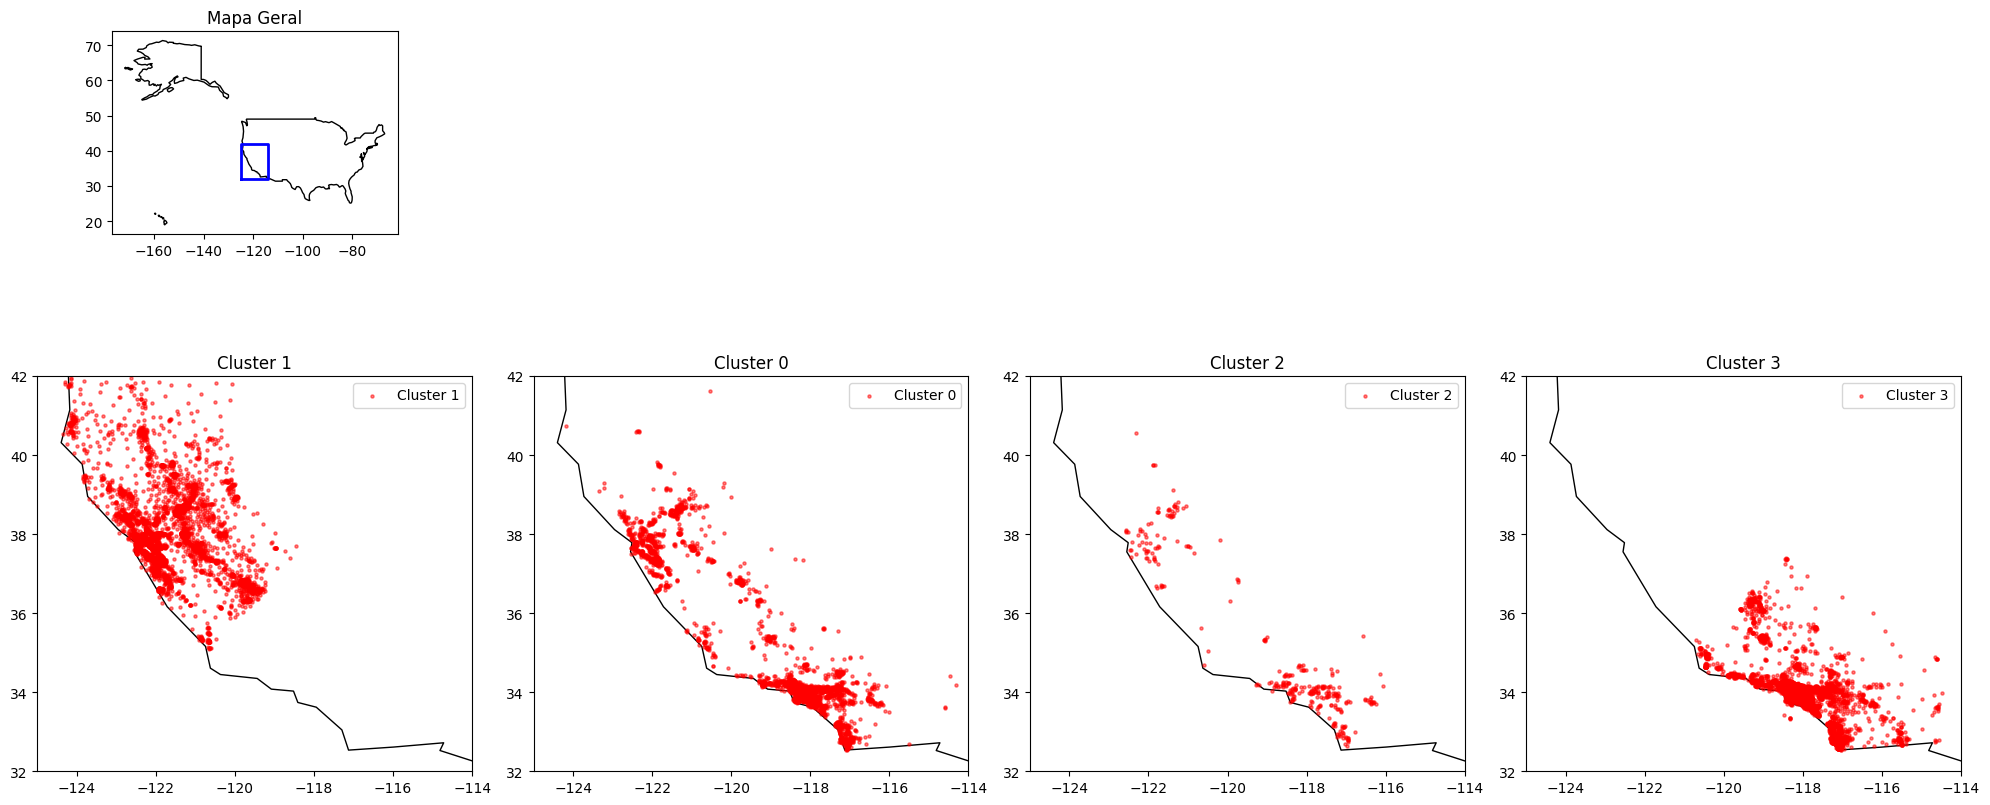

In [51]:
# Criar o mapa base
world = gpd.read_file('/content/drive/MyDrive/110m_cultural/ne_110m_admin_0_countries.shp')
usa = world[world.ADMIN == 'United States of America']

# Número de clusters
n_clusters = len(gdf['cluster'].unique())

# Criar subplots com espaço para o mapa geral
fig, axes = plt.subplots(nrows=2, ncols=n_clusters, figsize=(5 * n_clusters, 10),
                         gridspec_kw={'height_ratios': [1, n_clusters]}) # Ajusta a altura dos subplots

# Plotar o mapa geral no primeiro subplot
ax_geral = axes[0, 0]  # Primeiro subplot da primeira linha
usa.plot(ax=ax_geral, color='white', edgecolor='black')
ax_geral.plot([-125, -114, -114, -125, -125], [32, 32, 42, 42, 32],
             color='blue', linewidth=2, transform=ax_geral.transData)
ax_geral.set_title('Mapa Geral')

# Remover os demais subplots da primeira linha
for i in range(1, n_clusters):
    fig.delaxes(axes[0, i])


# Plotar cada cluster nos subplots da segunda linha
for i, cluster in enumerate(gdf['cluster'].unique()):
    ax = axes[1, i]  # Subplots da segunda linha

    usa.plot(ax=ax, color='white', edgecolor='black')

    cluster_data = gdf[gdf['cluster'] == cluster]
    cluster_data.plot(ax=ax, color='red', markersize=5, alpha=0.5, label=f'Cluster {cluster}')

    ax.set_xlim([-125, -114])
    ax.set_ylim([32, 42])
    ax.set_title(f'Cluster {cluster}')
    ax.legend()

# Ajustar o layout e exibir o mapa
plt.tight_layout()
plt.show()

###Análise dos resultados COM a variável categórica de proximidade com o oceano
A análise dos clusters gerados relevou insights importantes quando relacionados com a localização dos imóveis sua proximidade com o oceano evidenciando a influência da localização costeira na dinâmica do mercado imobiliário na California.
Nesse contexto:

O cluster 2 se destaca por ter imóveis maiores e mais novos, enquanto o cluster 1 tem imóveis menores e mais antigos. Os clusters 0 e 3 apresentaram maior concentração de imóveis próximos ao oceano, ambos estão localizados na região proxima a capital Los Angeles; o que também justifica o valor médio de casas mais alto para estes clusters e o cluster 2. Nessa região, a renda média também é mais alta especialemente para os clusters 0 e 2.

Esta análise mostra diferentes segmentos de mercado:
cluster 0 com áreas mais próximas a região central, imóveis maiores e preços altos; as áreas do cluster 1 são imóveis menores e mais antigos com preços mais baixos; o cluster 2 são imóveis maiores e mais novos, preços altos  e a renda familiar costuma ser mais alta também e o cluster 3 com áreas mais próximas ao oceano com imóveis de tamanho intermediário e preços moderados.








